<a href="https://colab.research.google.com/github/crislanecas/estudos_python/blob/main/IA/05_Aula_IA_langchain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Conteúdo desenvolvido durante aula do **bootcamp da SoulCode**, em maio de 2024.

# Preparando ambiente

In [1]:
# Instalando pacotes
!pip install langchain_experimental              # framework relacionado ao processamento de linguagem natural
!pip install langchain_google_genai              # acesso a recursos de inteligência artificial generativa do Google através do LangChain
!pip install cudf-cu12==<versão_compatible>      # instalação de uma versão específica deste pacote que seja compatível com outras dependências do seu projeto

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.5/199.5 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 18.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.9/307.9 kB 23.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 973.7/973.7 kB 31.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.2/121.2 kB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.3/49.3 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.5/142.5 kB 14.1 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 24.0
    Uninstalling packaging-24.0:
      Successfully uninstalled packaging-24.0
/bin/bash: -c: line 1: syntax error near unexpected token `newline'
/bin/bash: -c: line 1: `pip install cudf-cu12==<versão_compatible>      # instalação de uma versão específica deste pa

In [2]:
# Importa as bibliotecas
import pandas as pd
from langchain_experimental.agents import create_pandas_dataframe_agent
from langchain_google_genai import GoogleGenerativeAI
from langchain_google_genai.chat_models import ChatGoogleGenerativeAI
from google.colab import userdata

In [3]:
# Importa parte da biblioteca do Google Colab para ter acesso ao Google Drive, utilizando o método mount().
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Configurando acesso

In [4]:
# Configura acesso via API key, utilizando userdata para ocultar a key no código
api_key = userdata.get('sua_api_key')
llm = ChatGoogleGenerativeAI(model='gemini-pro', google_api_key=api_key, temperature=0.5)

# Importando dados

In [5]:
# Extração por Google Drive dos dados tratados
df = pd.read_csv('/content/drive/MyDrive/Datasets/YouTube/youtube_tratado.csv',
                 sep=',',
                 encoding='ISO-8859-1'
                 )

# Criando agente

In [6]:
# Cria um agente para manipular um dataframe
agent_executor = create_pandas_dataframe_agent(llm,
                                               df,
                                               agent_type='zero-shot-react-description',
                                               verbose=False,
                                               return_intermediate_steps=False
                                               )

In [7]:
# Pergunta 1
agent_executor.invoke('''Quais as 5 palavras-chaves com mais número de visualizações?''')

{'input': 'Quais as 5 palavras-chaves com mais número de visualizações?',
 'output': 'GOOGLE, ANIMAIS, MRBEAST, CAMA, MÚSICA'}

{'input': 'É possivel gerar alguma visualização com esses dados? Coloque o nome nos eixos em portugues',
 'output': "It is not possible to generate a visualization with the given data, as the x-axis should be in a numerical format, and the 'mes' column is in a string format."}

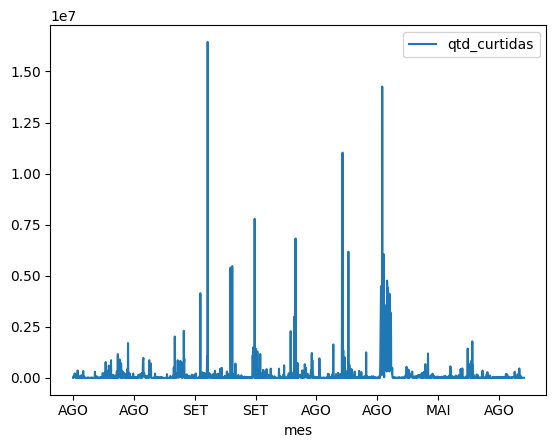

In [9]:
# Pergunta 2
agent_executor.invoke('''É possivel gerar alguma visualização com esses dados? Coloque o nome nos eixos em portugues''')

In [11]:
# Pergunta 3
agent_executor.invoke('''Com esses dados, poderia dar insigths de negócio importantes em português?''')

{'input': 'Com esses dados, poderia dar insigths de negócio importantes em português?',
 'output': 'A média de curtidas é de 168.827,2 e a média de comentários é de 7.808,16. A média de visualizações é de 11.682.250. A média do dia de publicação é 17,95 e a média do ano de publicação é 2020,88.'}

# Fonte

https://soulcode.com/

https://www.langchain.com/  

https://github.com/langchain-ai/langchain